# Import Required Libraries and Modules

In [ ]:
%%capture
!pip install pykeen==1.10.1 class-resolver==0.3.10

In [ ]:
from model import TransEModel #model.py
from data import KGDataHandler #data.py
import kagglehub
import torch
import matplotlib.pyplot as plt
import numpy as np

INFO:pykeen.utils:Using opt_einsum


In [ ]:
%%capture
!pip install opacus

In [ ]:
from trainer import TransETrainer #trainer.py

# Load and Prepare the Dataset

In [ ]:
# Download dataset
fb_path = kagglehub.dataset_download("latebloomer/fb15k-237")
print("Path to dataset files:", fb_path)

Path to dataset files: /kaggle/input/fb15k-237


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Train Models with Varying Noise Multipliers for Differential Privacy

In [ ]:
best_model_all = {}
training_losses_all = {}
epsilon_values_all = {}
metrics_all = {}
for noise_multiplier in [0.5, 0.7, 1.0, 1.3, 10]:
  print("-------------------------------------------")
  print("Noise multiplier =", noise_multiplier)
  print("-------------------------------------------")

  config = {
    'embedding_dim': 100,          # Size of the embedding vectors
    'learning_rate': 0.005,        # Step size for optimizer updates
    'noise_multiplier': noise_multiplier,      # Amount of noise added for differential privacy
    'batch_size': 256,             # Number of samples per training batch
    'norm_clipping': 1.0,          # Maximum L2 norm of per-sample gradients
    'margin': 0.5,                 # Margin for ranking loss
    'epochs': 155,                 # Total number of training iterations
    'confidential_ratio': 0.3,     # Fraction of training data needing privacy
    'device': device
    }
  data_handler = KGDataHandler(fb_path, confidential_ratio=config['confidential_ratio'])
  #data_handler.print_data_stats()
  # Initialize model
  model = TransEModel(
    entity_count=data_handler.entity_count,
    relation_count=data_handler.relation_count,
    embedding_dim=config['embedding_dim'],
    device=config['device']
   )
  trainer = TransETrainer(
    model=model,
    data_handler=data_handler,
    learning_rate=config['learning_rate'],
    noise_multiplier=config['noise_multiplier'],
    batch_size=config['batch_size'],
    norm_clipping=config['norm_clipping'],
    margin=config['margin'],
    epochs=config['epochs'],
    device=config['device']
  )
  # Start training with early stopping
  print("Starting training with early stopping...")
  best_model, training_losses, epsilon_values,all_metrics = trainer.train_with_early_stopping(patience=5)
  best_model_all[noise_multiplier] = best_model
  training_losses_all[noise_multiplier] = training_losses
  epsilon_values_all[noise_multiplier] = epsilon_values
  metrics_all[noise_multiplier] = all_metrics


-------------------------------------------
Noise multiplier = 0.5
-------------------------------------------


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Starting training with early stopping...
Epoch 1/155
  Epoch 1: mU=743, mC=319, avg_loss=0.4848
  Validation: MR=6438.21, MRR=0.0214, Hits@10=0.0380
  Current privacy guarantee: (ε = 5.85, δ = 1e-5)
Epoch 2/155
  Epoch 2: mU=1487, mC=637, avg_loss=0.4787
Epoch 3/155
  Epoch 3: mU=2230, mC=956, avg_loss=0.4778
Epoch 4/155
  Epoch 4: mU=2973, mC=1275, avg_loss=0.4778
Epoch 5/155
  Epoch 5: mU=3717, mC=1593, avg_loss=0.4776
Epoch 6/155
  Epoch 6: mU=4460, mC=1912, avg_loss=0.4783
  Current privacy guarantee: (ε = 8.47, δ = 1e-5)
Epoch 7/155
  Epoch 7: mU=5204, mC=2230, avg_loss=0.4777
Epoch 8/155
  Epoch 8: mU=5947, mC=2549, avg_loss=0.4773
Epoch 9/155
  Epoch 9: mU=6690, mC=2868, avg_loss=0.4780
Epoch 10/155
  Epoch 10: mU=7434, mC=3186, avg_loss=0.4778
Epoch 11/155
  Epoch 11: mU=8177, mC=3505, avg_loss=0.4783
  Validation: MR=6179.95, MRR=0.0155, Hits@10=0.0370
  Current privacy guarantee: (ε = 10.15, δ = 1e-5)
Epsilon exceed, stopping at epoch  11
-------------------------------------

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Starting training with early stopping...
Epoch 1/155
  Epoch 1: mU=743, mC=319, avg_loss=0.4873
  Validation: MR=6502.56, MRR=0.0073, Hits@10=0.0140
  Current privacy guarantee: (ε = 2.19, δ = 1e-5)
Epoch 2/155
  Epoch 2: mU=1487, mC=637, avg_loss=0.4836
Epoch 3/155
  Epoch 3: mU=2230, mC=956, avg_loss=0.4831
Epoch 4/155
  Epoch 4: mU=2973, mC=1275, avg_loss=0.4836
Epoch 5/155
  Epoch 5: mU=3717, mC=1593, avg_loss=0.4829
Epoch 6/155
  Epoch 6: mU=4460, mC=1912, avg_loss=0.4831
  Current privacy guarantee: (ε = 2.78, δ = 1e-5)
Epoch 7/155
  Epoch 7: mU=5204, mC=2230, avg_loss=0.4827
Epoch 8/155
  Epoch 8: mU=5947, mC=2549, avg_loss=0.4834
Epoch 9/155
  Epoch 9: mU=6690, mC=2868, avg_loss=0.4834
Epoch 10/155
  Epoch 10: mU=7434, mC=3186, avg_loss=0.4827
Epoch 11/155
  Epoch 11: mU=8177, mC=3505, avg_loss=0.4836
  Validation: MR=6160.91, MRR=0.0097, Hits@10=0.0190
  Current privacy guarantee: (ε = 3.20, δ = 1e-5)
Epoch 12/155
  Epoch 12: mU=8921, mC=3823, avg_loss=0.4799
Epoch 13/155
  Ep

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Starting training with early stopping...
Epoch 1/155
  Epoch 1: mU=743, mC=319, avg_loss=0.4914
  Validation: MR=6522.02, MRR=0.0034, Hits@10=0.0100
  Current privacy guarantee: (ε = 0.86, δ = 1e-5)
Epoch 2/155
  Epoch 2: mU=1487, mC=637, avg_loss=0.4876
Epoch 3/155
  Epoch 3: mU=2230, mC=956, avg_loss=0.4869
Epoch 4/155
  Epoch 4: mU=2973, mC=1275, avg_loss=0.4872
Epoch 5/155
  Epoch 5: mU=3717, mC=1593, avg_loss=0.4858
Epoch 6/155
  Epoch 6: mU=4460, mC=1912, avg_loss=0.4879
  Current privacy guarantee: (ε = 1.05, δ = 1e-5)
Epoch 7/155
  Epoch 7: mU=5204, mC=2230, avg_loss=0.4871
Epoch 8/155
  Epoch 8: mU=5947, mC=2549, avg_loss=0.4876
Epoch 9/155
  Epoch 9: mU=6690, mC=2868, avg_loss=0.4875
Epoch 10/155
  Epoch 10: mU=7434, mC=3186, avg_loss=0.4843
Epoch 11/155
  Epoch 11: mU=8177, mC=3505, avg_loss=0.4816
  Validation: MR=6362.51, MRR=0.0234, Hits@10=0.0470
  Current privacy guarantee: (ε = 1.21, δ = 1e-5)
Epoch 12/155
  Epoch 12: mU=8921, mC=3823, avg_loss=0.4792
Epoch 13/155
  Ep

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Starting training with early stopping...
Epoch 1/155
  Epoch 1: mU=743, mC=319, avg_loss=0.4938
  Validation: MR=6654.02, MRR=0.0030, Hits@10=0.0030
  Current privacy guarantee: (ε = 0.45, δ = 1e-5)
Epoch 2/155
  Epoch 2: mU=1487, mC=637, avg_loss=0.4903
Epoch 3/155
  Epoch 3: mU=2230, mC=956, avg_loss=0.4900
Epoch 4/155
  Epoch 4: mU=2973, mC=1275, avg_loss=0.4881
Epoch 5/155
  Epoch 5: mU=3717, mC=1593, avg_loss=0.4904
Epoch 6/155
  Epoch 6: mU=4460, mC=1912, avg_loss=0.4895
  Current privacy guarantee: (ε = 0.59, δ = 1e-5)
Epoch 7/155
  Epoch 7: mU=5204, mC=2230, avg_loss=0.4890
Epoch 8/155
  Epoch 8: mU=5947, mC=2549, avg_loss=0.4893
Epoch 9/155
  Epoch 9: mU=6690, mC=2868, avg_loss=0.4877
Epoch 10/155
  Epoch 10: mU=7434, mC=3186, avg_loss=0.4847
Epoch 11/155
  Epoch 11: mU=8177, mC=3505, avg_loss=0.4839
  Validation: MR=6475.61, MRR=0.0118, Hits@10=0.0260
  Current privacy guarantee: (ε = 0.71, δ = 1e-5)
Epoch 12/155
  Epoch 12: mU=8921, mC=3823, avg_loss=0.4824
Epoch 13/155
  Ep

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Starting training with early stopping...
Epoch 1/155
  Epoch 1: mU=743, mC=319, avg_loss=0.4982
  Validation: MR=7292.50, MRR=0.0044, Hits@10=0.0040
  Current privacy guarantee: (ε = 0.10, δ = 1e-5)
Epoch 2/155


/usr/local/lib/python3.11/dist-packages/opacus/accountants/analysis/rdp.py:332: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(


  Epoch 2: mU=1487, mC=637, avg_loss=0.4989
Epoch 3/155
  Epoch 3: mU=2230, mC=956, avg_loss=0.4988
Epoch 4/155
  Epoch 4: mU=2973, mC=1275, avg_loss=0.4979
Epoch 5/155
  Epoch 5: mU=3717, mC=1593, avg_loss=0.4973
Epoch 6/155
  Epoch 6: mU=4460, mC=1912, avg_loss=0.4963
  Current privacy guarantee: (ε = 0.11, δ = 1e-5)
Epoch 7/155
  Epoch 7: mU=5204, mC=2230, avg_loss=0.4983
Epoch 8/155
  Epoch 8: mU=5947, mC=2549, avg_loss=0.4979
Epoch 9/155
  Epoch 9: mU=6690, mC=2868, avg_loss=0.4976
Epoch 10/155
  Epoch 10: mU=7434, mC=3186, avg_loss=0.4975
Epoch 11/155
  Epoch 11: mU=8177, mC=3505, avg_loss=0.4975
  Validation: MR=6787.01, MRR=0.0087, Hits@10=0.0090
  Current privacy guarantee: (ε = 0.11, δ = 1e-5)
Epoch 12/155
  Epoch 12: mU=8921, mC=3823, avg_loss=0.4976
Epoch 13/155
  Epoch 13: mU=9664, mC=4142, avg_loss=0.4963
Epoch 14/155
  Epoch 14: mU=10407, mC=4461, avg_loss=0.4960
Epoch 15/155
  Epoch 15: mU=11151, mC=4779, avg_loss=0.4958
Epoch 16/155
  Epoch 16: mU=11894, mC=5098, avg_l

# Visualize Training Metrics and Privacy Trends

## Model Performance Metrics

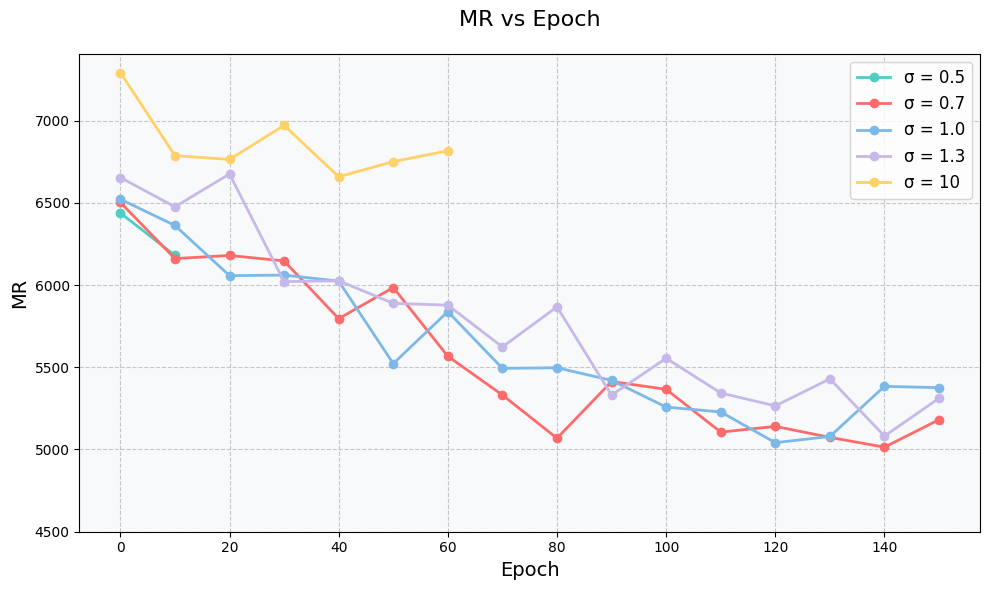

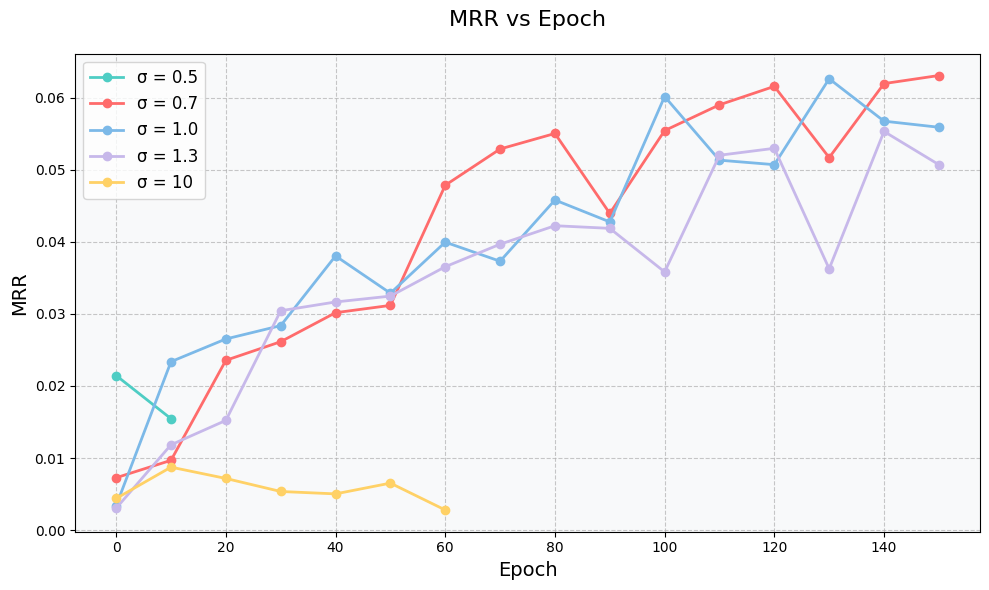

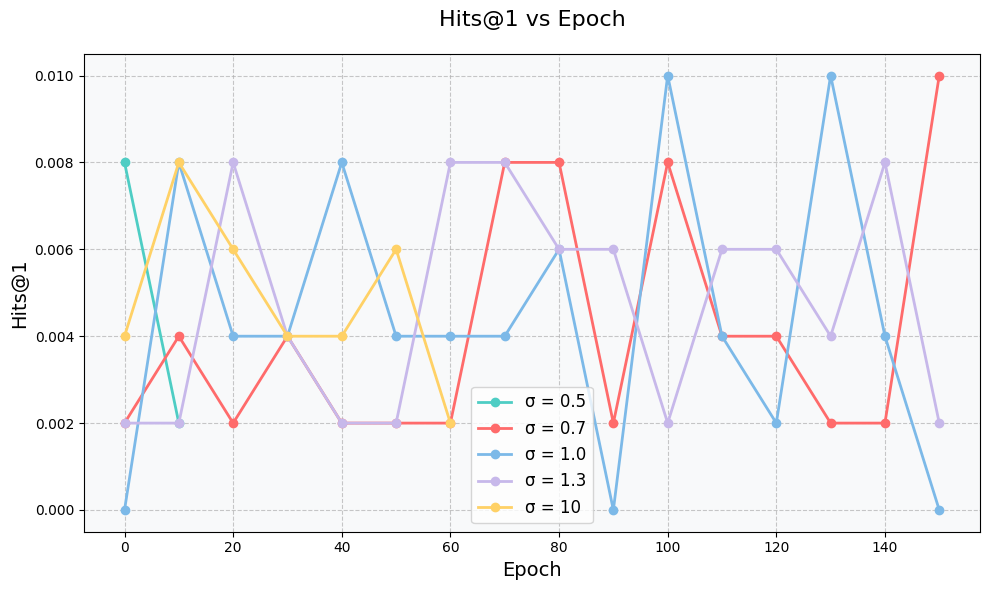

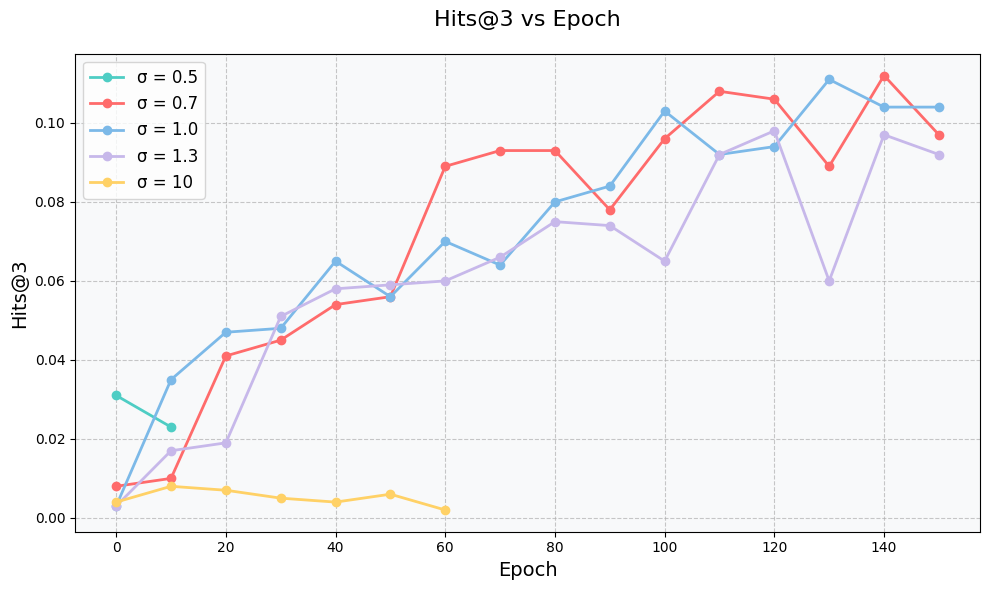

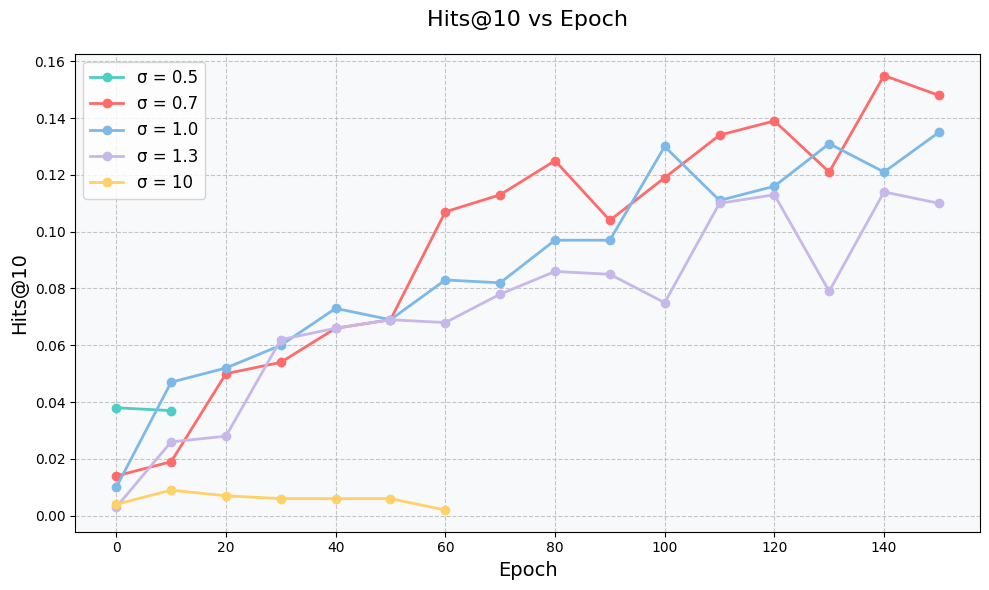

In [ ]:
# Define metrics and values (assuming data is already defined)
metrics = ['MR', 'MRR', 'Hits@1', 'Hits@3', 'Hits@10']
values = [0.5, 0.7, 1.0, 1.3, 10]
colors = ['#4ECDC4', '#FF6B6B', '#7CB9E8', '#C7B8EA', '#FFD166']  # Teal, Coral, Light blue, Lavender, Light yellow

# Function to extract x and y values for plotting
def extract_data(value, metric):
    epochs = [entry['epoch'] for entry in metrics_all[value]]
    metrics_values = [entry[metric] for entry in metrics_all[value]]
    return epochs, metrics_values

# Create 5 separate figures, one for each metric
for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))

    # Plot each value line
    for j, value in enumerate(values):
        epochs, metric_values = extract_data(value, metric)
        plt.plot(epochs, metric_values, marker='o', linestyle='-', color=colors[j],
                 linewidth=2, markersize=6, label=f'σ = {value}')

    # Set titles, labels, grid, and legend
    plt.title(f'{metric} vs Epoch', fontsize=16, pad=20)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)

    # Add a light background color for better readability
    plt.gca().set_facecolor('#f8f9fa')

    # For MR (it's much larger than others), set appropriate y-scale
    if metric == 'MR':
        plt.ylim(bottom=4500)  # Adjust as needed

    # Improve layout and save each figure
    plt.tight_layout()
    plt.savefig(f'{metric}_vs_epoch.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

## Compare Training Loss Across Noise Multipliers

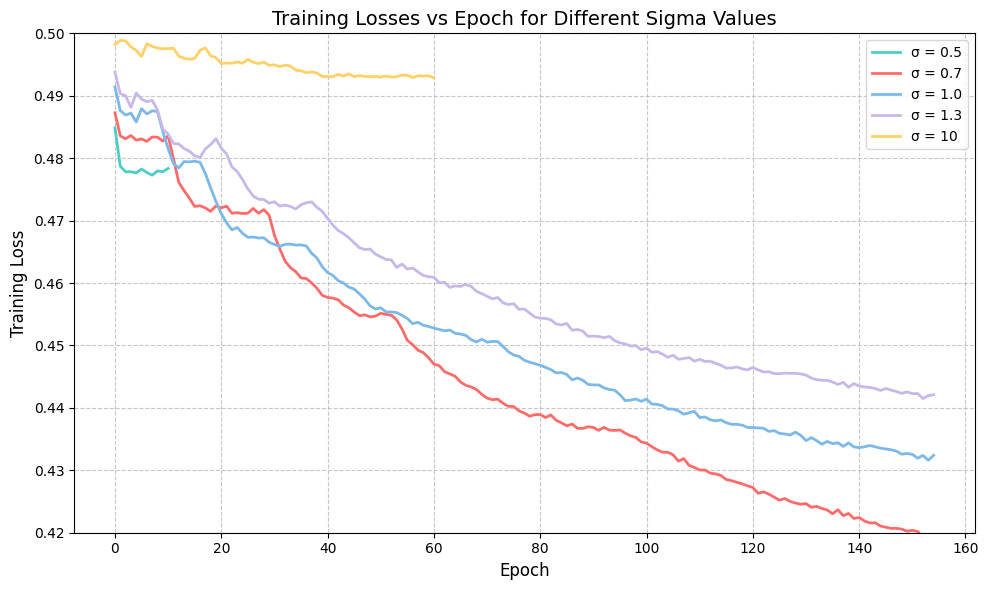

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.figure(figsize=(10, 6))

# Define colors and markers for different sigma values
colors = ['#4ECDC4', '#FF6B6B', '#7CB9E8', '#C7B8EA', '#FFD166']


# Plot each sigma value
for i, (sigma, losses) in enumerate(training_losses_all.items()):
    epochs = np.arange(len(losses))
    plt.plot(epochs, losses, label=f'σ = {sigma}',
              color=colors[i % len(colors)],
              linewidth=2)

# Set labels and title
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Training Loss', fontsize=12)
plt.title('Training Losses vs Epoch for Different Sigma Values', fontsize=14)

# Set y-axis limits to better visualize the differences
plt.ylim(0.42, 0.50)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='best')

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

# Optionally save the figure
plt.savefig('training_losses_plot.png', dpi=300, bbox_inches='tight')



## Track Epsilon Variation During Training for Each Noise Multiplier

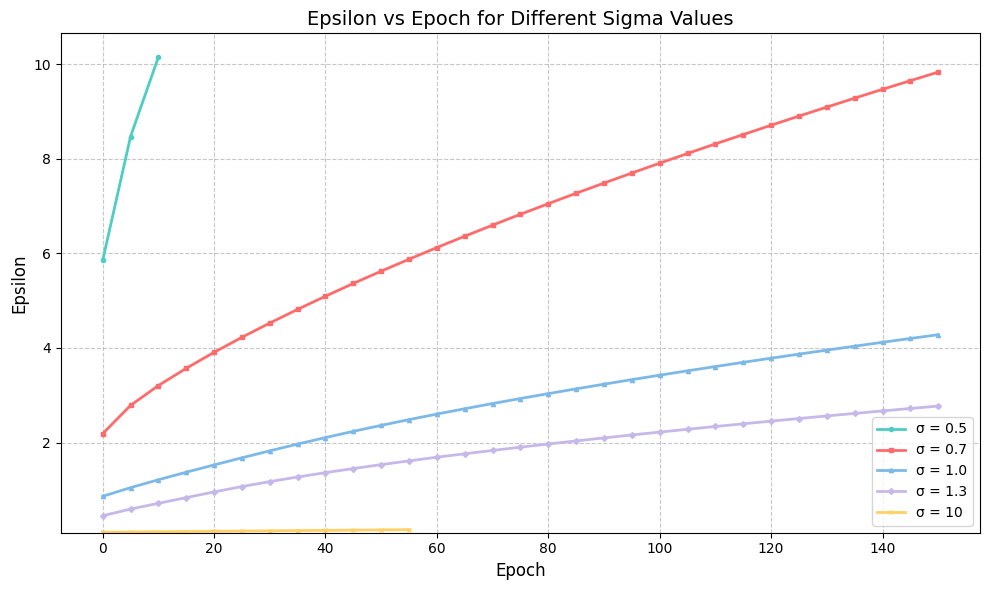

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming epsilon_values_all is already defined
# Plot epsilon vs epoch for all sigma values
plt.figure(figsize=(10, 6))

colors = colors = ['#4ECDC4', '#FF6B6B', '#7CB9E8', '#C7B8EA', '#FFD166']
markers = ['o', 's', '^', 'D', 'x']
sigma_values = [0.5, 0.7, 1.0, 1.3, 10]

for i, sigma in enumerate(sigma_values):
    # Extract epochs and epsilon values
    epochs = [x[0] for x in epsilon_values_all[sigma]]
    epsilons = [x[1] for x in epsilon_values_all[sigma]]

    # Plot with different color and marker for each sigma
    plt.plot(epochs, epsilons,
             color=colors[i],
             marker=markers[i],
             linestyle='-',
             linewidth=2,
             markersize=3,
             label=f'σ = {sigma}')

# Add labels and legend
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Epsilon', fontsize=12)
plt.title('Epsilon vs Epoch for Different Sigma Values', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Ensure y-axis starts from 0 or slightly below for better visualization
y_min = min([min([x[1] for x in values]) for values in epsilon_values_all.values()])
plt.ylim(bottom=max(0, y_min*0.9))

# Enhance visual appearance
plt.tight_layout()
plt.savefig('epsilon_vs_epoch.png', dpi=300)
plt.show()

## Analyze the Privacy-Utility Tradeoff

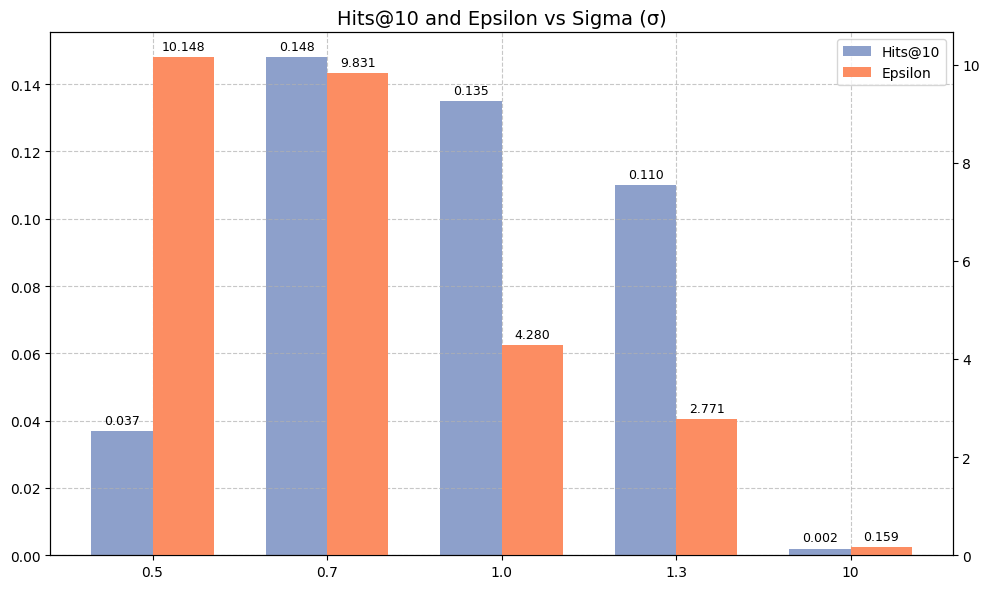

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sigma_values = [0.5, 0.7, 1.0, 1.3, 10]

# Extract Hits@10 from best_model_all
hits_at_10 = [metrics_all[sigma][-1]['Hits@10'] for sigma in sigma_values]

# Extract the last epsilon value for each sigma
epsilon_values = [epsilon_values_all[sigma][-1][1] for sigma in sigma_values]

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(sigma_values))
r2 = [x + bar_width for x in r1]

# Create the bars for Hits@10
bars1 = ax1.bar(r1, hits_at_10, width=bar_width, color='#8da0cb', label='Hits@10')


# Create a second y-axis for epsilon values
ax2 = ax1.twinx()
bars2 = ax2.bar(r2, epsilon_values, width=bar_width, color='#fc8d62', label='Epsilon')

# Set the x-axis ticks and labels
plt.xlabel('Noise Multiplier', fontsize=12)

ax1.set_xticks([r + bar_width/2 for r in range(len(sigma_values))])
ax1.set_xticklabels([f'{sigma}' for sigma in sigma_values])

# Create the legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Add a title
plt.title('Hits@10 and Epsilon vs Sigma (σ)', fontsize=14)

# Function to add value labels on top of bars
def add_value_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

# Add value labels to both sets of bars
add_value_labels(bars1, ax1)
add_value_labels(bars2, ax2)

# Add grid for better readability (optional)
ax1.grid(True, linestyle='--', alpha=0.7)

# Adjust the layout to prevent clipping of labels
plt.tight_layout()
plt.savefig('privacy utility tradeoff')
# Show the plot
plt.show()

# Save Trained Model for Future Use

In [ ]:
# prompt: save best_model_all in a file that can be used later, use file extension appropriately

import pickle

# Assuming best_model_all is defined as in your original code

# Save the dictionary to a file
with open('best_model_all.pkl', 'wb') as file:
    pickle.dump(best_model_all, file)
